<a href="https://colab.research.google.com/github/denis-mwangi/Covid-19-dataset-visualization-Project/blob/main/Covid_19DataTracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Install plotly (optional for choropleth)
!pip install plotly

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [17]:
# Load dataset (you must upload the file in Colab or mount Google Drive)
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Preview structure
print("Columns:")
print(df.columns.tolist())
df.head()


Columns:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [18]:
# Filter countries of interest
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]

# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Handle missing values in key columns
df[['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']] = df[[
    'total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations'
]].fillna(0)

df = df.dropna(subset=['date'])


<ipython-input-18-81f2c1659cd6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-18-81f2c1659cd6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']] = df[[


In [19]:
# Check the most recent valid data for selected countries
latest_valid_df = df[df['location'].isin(countries)].copy()

# Replace NaNs with 0 for simplicity
latest_valid_df[['total_cases', 'total_deaths', 'new_cases']] = latest_valid_df[[
    'total_cases', 'total_deaths', 'new_cases'
]].fillna(0)

# Group by date, then filter where all countries have non-zero data
valid_dates = latest_valid_df.groupby('date').filter(
    lambda x: set(x['location']) == set(countries) and all(x[['total_cases', 'total_deaths']].sum() > 0)
)['date'].unique()

# Pick the latest such date
latest_date_fixed = max(valid_dates)
print("Latest valid date:", latest_date_fixed)

# Now get data for that fixed date
latest_df = latest_valid_df[latest_valid_df['date'] == latest_date_fixed]

Latest valid date: 2024-08-04 00:00:00


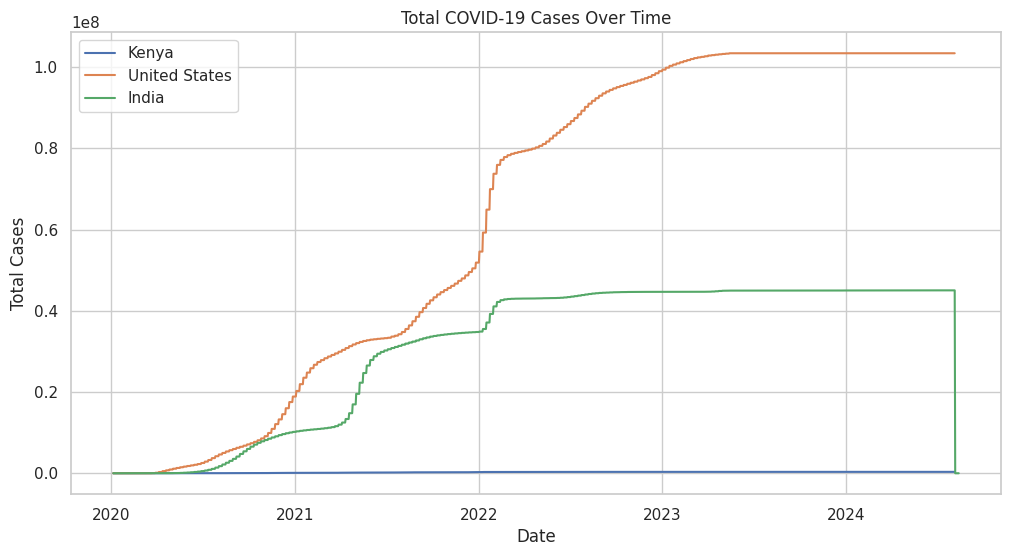

In [20]:
# Plot total cases over time
plt.figure()
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

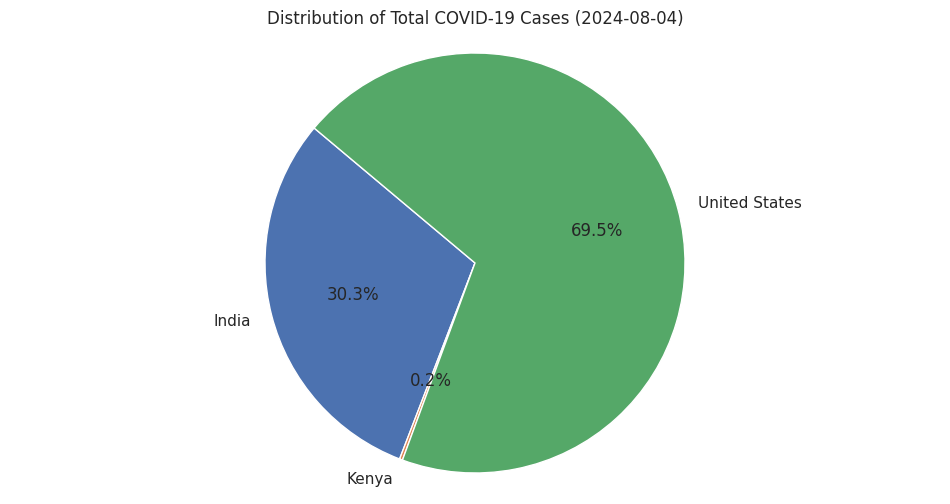

In [21]:
# --- Total Cases Pie Chart ---

# Set the valid date
latest_date_cases = pd.to_datetime("2024-08-04")

# Filter and clean data
latest_df_cases = df[(df['date'] == latest_date_cases) & (df['location'].isin(countries))].copy()
latest_df_cases['total_cases'] = latest_df_cases['total_cases'].fillna(0)

# Plot pie chart
cases_data = latest_df_cases[latest_df_cases['total_cases'] > 0]
if not cases_data.empty:
    plt.figure()
    plt.pie(cases_data['total_cases'], labels=cases_data['location'], autopct='%1.1f%%', startangle=140)
    plt.title("Distribution of Total COVID-19 Cases (2024-08-04)")
    plt.axis('equal')
    plt.show()
else:
    print("⚠️ No valid case data available for pie chart.")


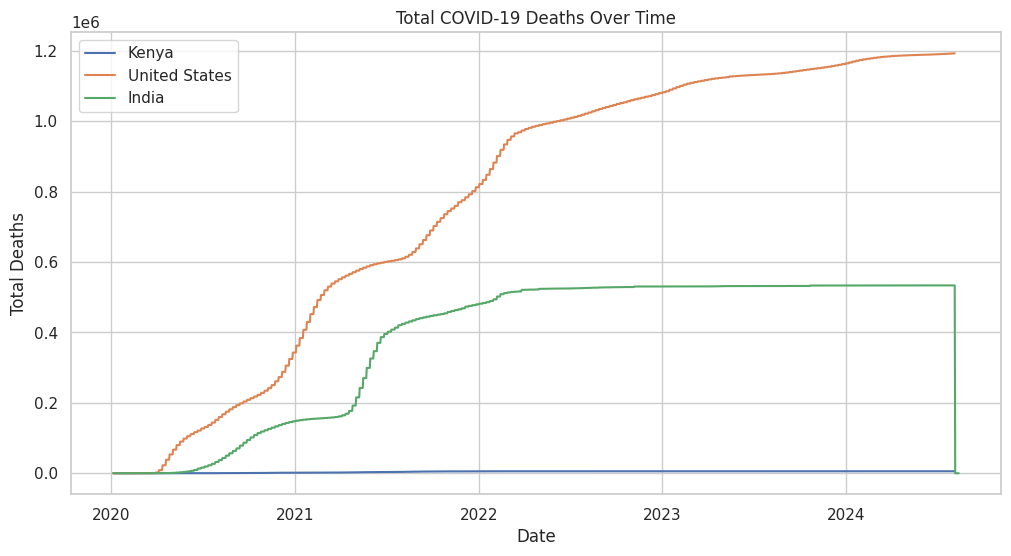

In [22]:
# Plot total deaths over time
plt.figure()
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()

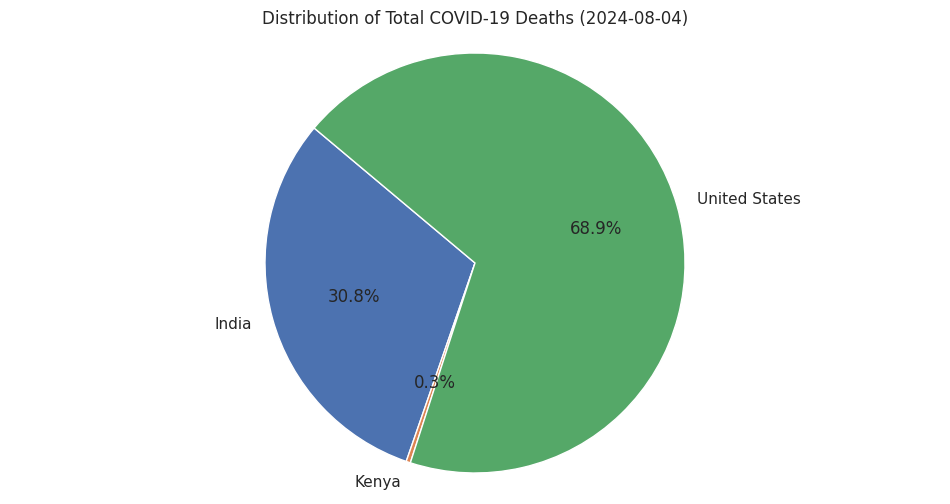

In [23]:
# --- Total Deaths Pie Chart ---

# Set the valid date
latest_date_deaths = pd.to_datetime("2024-08-04")

# Filter and clean data
latest_df_deaths = df[(df['date'] == latest_date_deaths) & (df['location'].isin(countries))].copy()
latest_df_deaths['total_deaths'] = latest_df_deaths['total_deaths'].fillna(0)

# Plot pie chart
deaths_data = latest_df_deaths[latest_df_deaths['total_deaths'] > 0]
if not deaths_data.empty:
    plt.figure()
    plt.pie(deaths_data['total_deaths'], labels=deaths_data['location'], autopct='%1.1f%%', startangle=140)
    plt.title("Distribution of Total COVID-19 Deaths (2024-08-04)")
    plt.axis('equal')
    plt.show()
else:
    print("⚠️ No valid death data available for pie chart.")


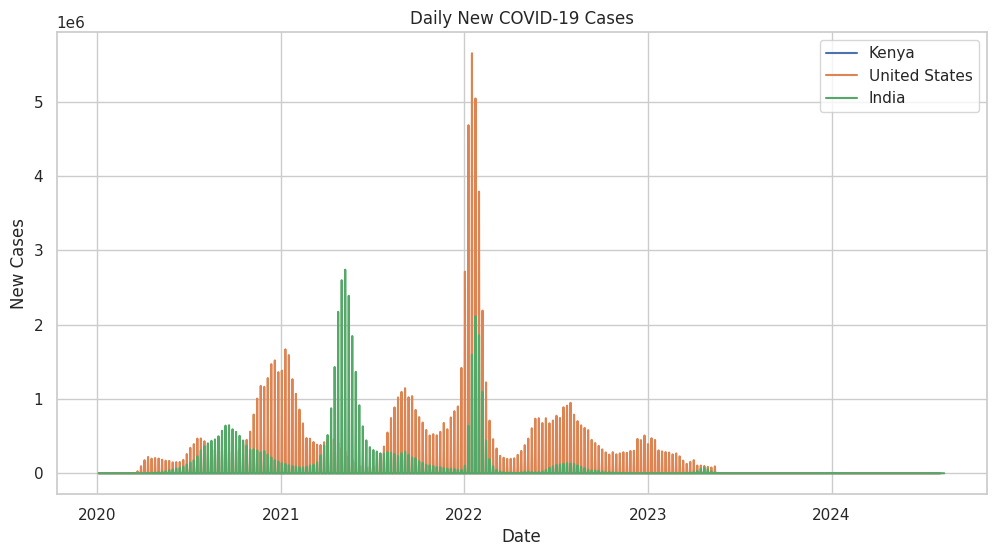

In [24]:
# Compare new daily cases
plt.figure()
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()

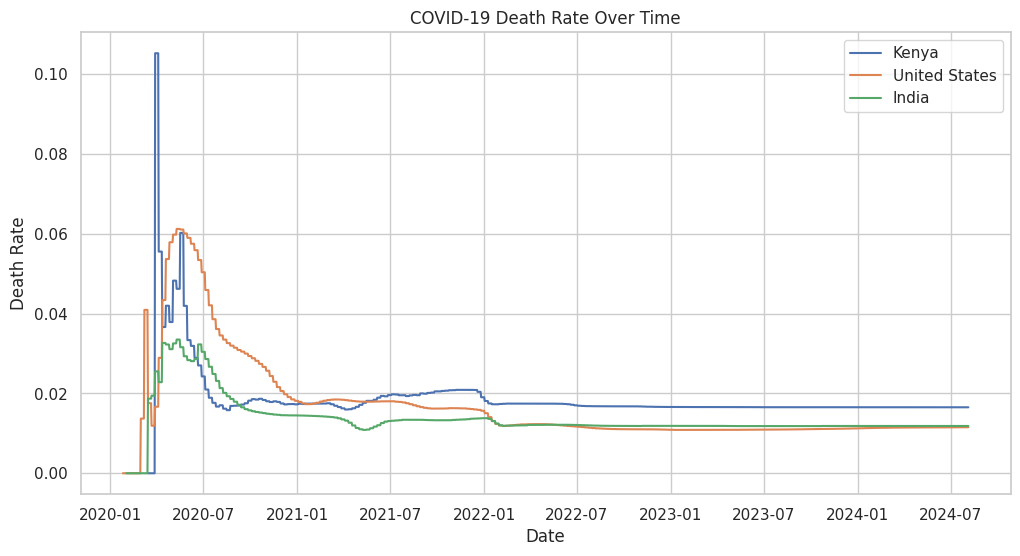

In [25]:
# Death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']
plt.figure()
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.show()


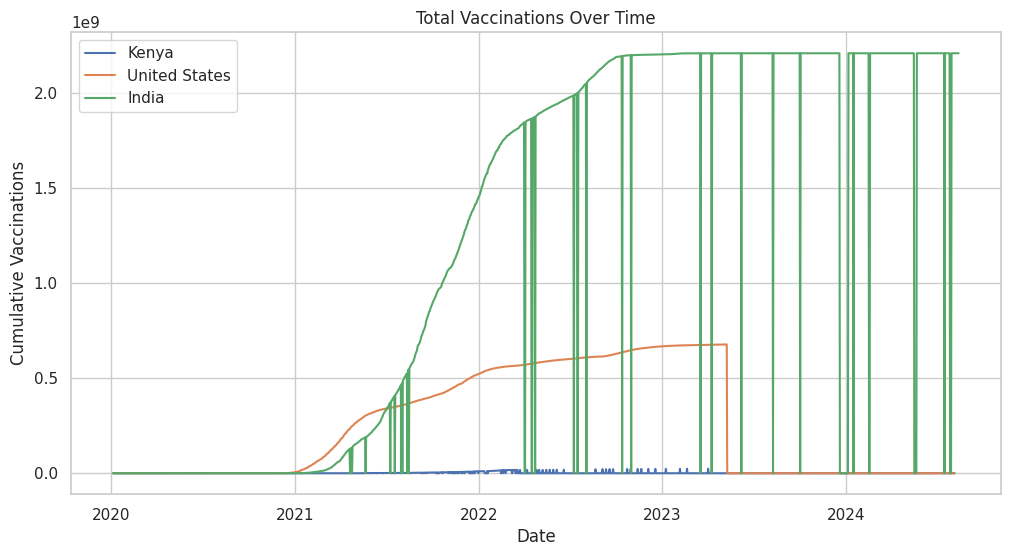

In [26]:
# Cumulative vaccinations
plt.figure()
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Vaccinations")
plt.legend()
plt.show()


⚠️ No valid vaccination percentage for Kenya
⚠️ No valid vaccination percentage for United States


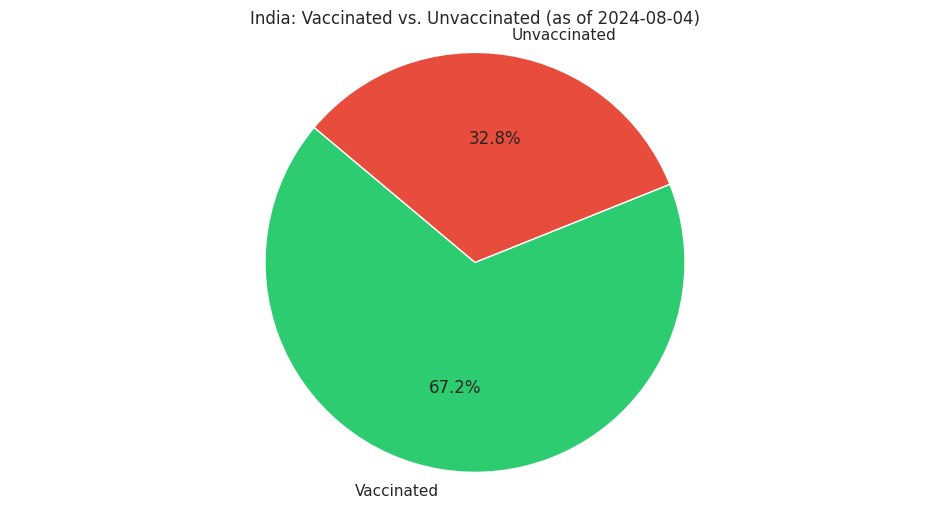

In [28]:
# --- Vaccinated vs. Unvaccinated Pie Chart for Each Country ---

# Set the valid date
latest_date_vax = pd.to_datetime("2024-08-04")

# Filter data for selected countries
vax_df = df[(df['date'] == latest_date_vax) & (df['location'].isin(countries))].copy()

# Loop through each country and plot pie chart
for country in countries:
    country_data = vax_df[vax_df['location'] == country]

    if not country_data.empty:
        vaccinated_pct = country_data['people_fully_vaccinated_per_hundred'].values[0]
        if pd.notnull(vaccinated_pct) and vaccinated_pct > 0:
            vaccinated = vaccinated_pct
            unvaccinated = 100 - vaccinated

            plt.figure()
            plt.pie(
                [vaccinated, unvaccinated],
                labels=['Vaccinated', 'Unvaccinated'],
                autopct='%1.1f%%',
                startangle=140,
                colors=['#2ecc71', '#e74c3c']
            )
            plt.title(f"{country}: Vaccinated vs. Unvaccinated (as of 2024-08-04)")
            plt.axis('equal')
            plt.show()
        else:
            print(f"⚠️ No valid vaccination percentage for {country}")
    else:
        print(f"⚠️ No data for {country} on {latest_date_vax.date()}")


In [30]:
import plotly.express as px

# Set latest date
latest_date_map = pd.to_datetime("2024-08-04")

# Filter data for that date
map_df = df[df['date'] == latest_date_map].copy()

# Keep only rows with total_cases and iso_code (needed for map)
map_df = map_df[['location', 'iso_code', 'total_cases']].dropna()

# Filter out aggregates (e.g., continents like "World", "Asia", etc.)
map_df = map_df[map_df['iso_code'].str.len() == 3]  # ISO alpha-3 codes are 3 letters


In [41]:
# Plot the map
fig = px.choropleth(
    map_df,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title='Total COVID-19 Cases by Country (as of 2024-08-04)',
    labels={'total_cases': 'Total Cases'},
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


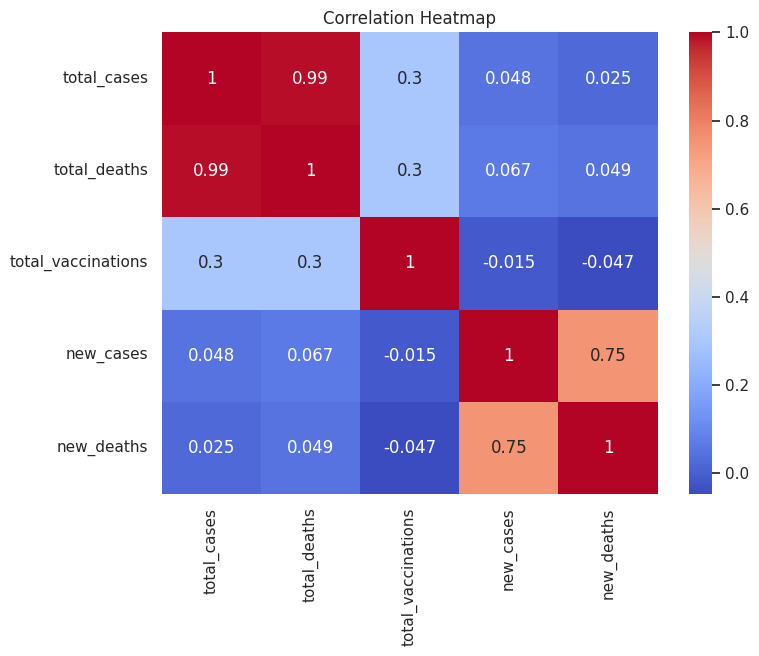

In [33]:
import seaborn as sns

corr = df[["total_cases", "total_deaths", "total_vaccinations", "new_cases", "new_deaths"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
